In [9]:
from lsh import *
from utils import *
from query import *
import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:

k = 10
L = 4
d = 1024   #data dimensionality
N_queries = 200

# Ns = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
# Ns = [100, 500, 1000, 2000]
# for n in range(10000, 100000, 10000):
#     Ns.append(n)
    
Ns = []
for x in np.linspace(2, 5, 10):
    Ns.append(int(10**x))
print(Ns)

d1s = []
d2s = []
print("N, LSH, Linear ")
for n_idx, n in enumerate(Ns):
    G = data_generator(n=n,d=d,normalize=True)
    b = 200 #hash bits
    M = 30  #number of permutations
    model = LSH(X=G.get_dataset(),b=b,M=M)

    t1 = time.time()
    for i in range(N_queries):
        model.approx_top_k(G.get_query(), k, L, refine="innerprod")
    t2 = time.time()
    duration1 = (t2-t1)/N_queries*1000
    
    t1 = time.time()
    for i in range(N_queries):
        model.exact_top_k(G.get_query(), k)
    t2 = time.time()
    duration2 = (t2-t1)/N_queries*1000
    
    print("{},{:6.3f}, {:6.3f}".format(n, duration1, duration2))
    d1s.append(duration1)
    d2s.append(duration2)
    



[100, 215, 464, 1000, 2154, 4641, 10000, 21544, 46415, 100000]
N, LSH, Linear 
100, 1.226,  0.070
215, 1.395,  0.080
464, 1.617,  0.127
1000, 2.967,  0.310
2154, 3.563,  1.047
4641, 4.202,  2.700
10000, 4.022,  5.270
21544, 5.379, 12.674
46415, 7.013, 27.283
100000,14.769, 55.871


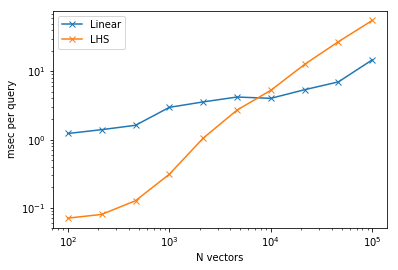

In [51]:
plt.loglog(Ns, d1s, '-x', label="Linear")
plt.loglog(Ns, d2s, '-x', label="LHS")
plt.xlabel("N vectors")
plt.ylabel("msec per query")
plt.legend()

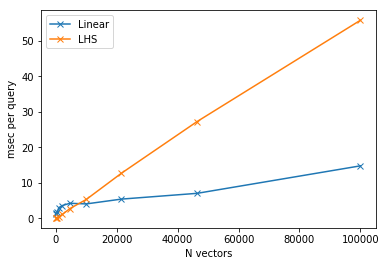

In [52]:
plt.plot(Ns, d1s, '-x', label="Linear")
plt.plot(Ns, d2s, '-x', label="LHS")
plt.xlabel("N vectors")
plt.ylabel("msec per query")
plt.legend()